<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest (or Bootstrap Aggregation)

In [398]:
import seaborn as sns
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib


def save_model(model,model_name):
 joblib.dump(model, model_name+".sav")

def load_model(model_name):
  return joblib.load(model_name)


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", sm.mean_absolute_error(y_actual, y_pred))
  print("Mean squared error =", sm.mean_squared_error(y_actual, y_pred))
  print("Root mean squared error =", sqrt(sm.mean_squared_error(y_actual, y_pred)))
  print("Median absolute error =", sm.median_absolute_error(y_actual, y_pred))
  print("Explain variance score =", sm.explained_variance_score(y_actual, y_pred))
  print("R2 score =", sm.r2_score(y_actual, y_pred))


In [399]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error

dataset = pd.read_excel("/content/dataset 11.xlsx")

In [400]:
dataset

,Type,M/C Dia (Output),M/C gauge (Output),Yarn Count,Stich Length,Finish Dia,Finish GSM,Color Range,Shrinkage Length,Shrinkage Width,Twist
0,TERRY,32,24,24.0,2.90,70,240,Light,-2.0,-5.0,2.4
1,TERRY,30,24,24.0,2.90,66,240,Light,-3.0,-4.3,0.5
2,TERRY,32,24,24.0,2.90,70,240,Light,-6.1,-3.0,0.5
3,TERRY,30,24,24.0,2.90,66,240,Light,-5.6,-4.3,2.3
4,FLEECE,26,24,30.0,3.05,60,260,Light,-3.7,-5.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
83,"RIB (2x2, 1x1, 2x1)",40,18,28.0,2.62,76,225,Average,-4.1,-8.0,5.0
84,"RIB (2x2, 1x1, 2x1)",40,18,28.0,2.62,76,225,Black,-1.3,-11.0,5.0
85,"RIB (2x2, 1x1, 2x1)",42,18,34.0,2.90,50,240,Wash,-3.0,-5.0,4.5
86,"RIB (2x2, 1x1, 2x1)",42,18,34.0,2.90,50,240,Wash,-3.5,-4.0,2.0


In [401]:
dataset.shape

(88, 11)

In [402]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                88 non-null     object 
 1   M/C Dia (Output)    88 non-null     int64  
 2   M/C gauge (Output)  88 non-null     int64  
 3   Yarn Count          88 non-null     float64
 4   Stich Length        88 non-null     float64
 5   Finish Dia          88 non-null     int64  
 6   Finish GSM          88 non-null     int64  
 7   Color Range         88 non-null     object 
 8   Shrinkage Length    88 non-null     float64
 9   Shrinkage Width     88 non-null     float64
 10  Twist               88 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 7.7+ KB


In [403]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["Type"]=encoder.fit_transform(dataset["Type"])
dataset["Color Range"]=encoder.fit_transform(dataset["Color Range"])

In [404]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                88 non-null     int64  
 1   M/C Dia (Output)    88 non-null     int64  
 2   M/C gauge (Output)  88 non-null     int64  
 3   Yarn Count          88 non-null     float64
 4   Stich Length        88 non-null     float64
 5   Finish Dia          88 non-null     int64  
 6   Finish GSM          88 non-null     int64  
 7   Color Range         88 non-null     int64  
 8   Shrinkage Length    88 non-null     float64
 9   Shrinkage Width     88 non-null     float64
 10  Twist               88 non-null     float64
dtypes: float64(5), int64(6)
memory usage: 7.7 KB


#Regression Model for `M/C Dia (Output)`

In [405]:
list(dataset.columns)

['Type',
 'M/C Dia (Output)',
 'M/C gauge (Output)',
 'Yarn Count',
 'Stich Length',
 'Finish Dia',
 'Finish GSM',
 'Color Range',
 'Shrinkage Length',
 'Shrinkage Width',
 'Twist']

In [406]:
feature_columns = [
'Type',
 'Yarn Count',
 'Stich Length',
 'Finish Dia',
 'Finish GSM',
 'Color Range',
 'Shrinkage Length',
 'Shrinkage Width',
 'Twist']

X = dataset.loc[:,feature_columns]
y = dataset['M/C Dia (Output)']

In [407]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=11)

In [408]:
#RF model
model_rf = RandomForestRegressor(n_estimators=35,random_state=0)
model_rf.fit(X_train, y_train)

pred_test = model_rf.predict(X_test)
res(y_test,pred_test)

Mean absolute error = 0.9555555555555552
Mean squared error = 3.2005442176870735
Root mean squared error = 1.789006489000829
Median absolute error = 0.3999999999999986
Explain variance score = 0.8749880040555328
R2 score = 0.8724820060832991


In [409]:
save_model(model_rf,"M-C_Dia")

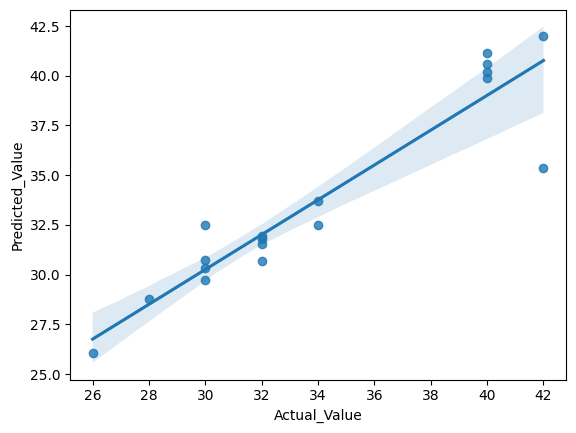

In [410]:
prim_plot(y_test,pred_test)

#Regression Model for `M/C gauge (Output)`

In [411]:
feature_columns = [
'Type',
 'Yarn Count',
 'Stich Length',
 'Finish Dia',
 'Finish GSM',
 'Color Range',
 'Shrinkage Length',
 'Shrinkage Width',
 'Twist']

X = dataset.loc[:,feature_columns]
y = dataset['M/C gauge (Output)']

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [413]:
#RF model
model_rf = RandomForestRegressor(n_estimators=35,random_state=0)
model_rf.fit(X_train, y_train)

pred_test = model_rf.predict(X_test)
res(y_test,pred_test)

Mean absolute error = 0.4730158730158729
Mean squared error = 1.177142857142857
Root mean squared error = 1.08496214548843
Median absolute error = 0.0
Explain variance score = 0.8700759637188209
R2 score = 0.8675714285714285


In [414]:
save_model(model_rf,"M-C_gauge")

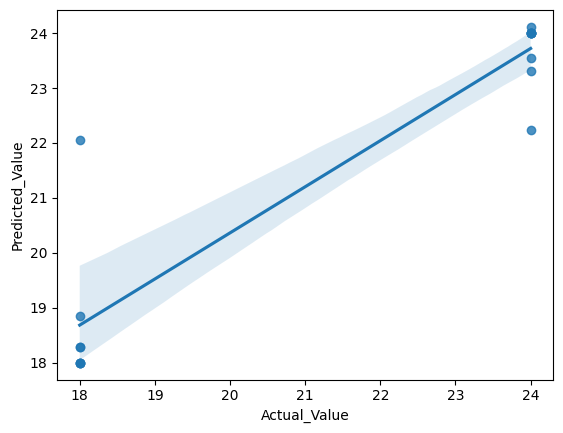

In [415]:
prim_plot(y_test,pred_test)

In [416]:


def prime_tune(X_train,X_test,y_train, y_test):
  l=[]
  for i in tqdm(range(0,500)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=i)
    model_rf = RandomForestRegressor(n_estimators=35,random_state=0)
    model_rf.fit(X_train, y_train)

    pred_test = model_rf.predict(X_test)
    l.append((sm.r2_score(y_test, pred_test),i))
  return l